In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
airbnb = pd.read_csv('/Users/pawankumarkc/Documents/vscodepython/MLAlgo/datasets/AirBNB.csv')
airbnb.shape

/var/folders/xf/kbnr5k6x1jdf2_jb1xc41d580000gn/T/ipykernel_4208/1256290169.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb = pd.read_csv('/Users/pawankumarkc/Documents/vscodepython/MLAlgo/datasets/AirBNB.csv')


(74111, 11)

In [3]:
airbnb.columns

Index(['id', 'room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')

In [4]:
airbnb.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [5]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


In [6]:
airbnb.isnull().sum()

id                          0
room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

# Part 1: Missing value treatment

In [7]:
airbnb['room_type'].describe()

count               74106
unique                  3
top       Entire home/apt
freq                41308
Name: room_type, dtype: object

In [8]:
# room_type is a object type, there are 5 missing values, replace them with mode(Most freq value)
airbnb['room_type'].fillna(airbnb['room_type'].mode()[0], inplace=True)

### Accommodates column

In [9]:
airbnb['accommodates'].describe()

count    74108.000000
mean         3.155125
std          2.153603
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         16.000000
Name: accommodates, dtype: float64

<Axes: ylabel='accommodates'>

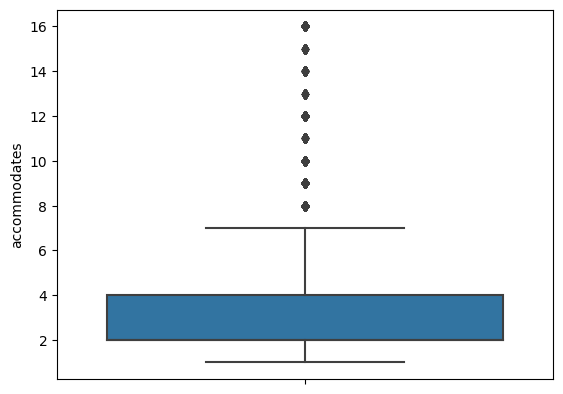

In [10]:
sns.boxplot(data=airbnb, y='accommodates')

In [11]:
airbnb['accommodates'].fillna(airbnb['accommodates'].median(), inplace=True)

### Bathrooms column

In [12]:
airbnb['bathrooms'].describe()

count    73908.000000
mean         1.235272
std          0.582054
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: bathrooms, dtype: float64

<Axes: ylabel='bathrooms'>

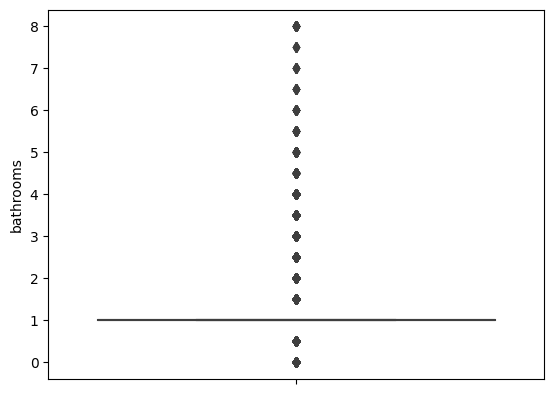

In [13]:
sns.boxplot(data=airbnb, y='bathrooms')

In [14]:
airbnb['bathrooms'].fillna(airbnb['bathrooms'].median(), inplace=True)

### review_scores_rating column

In [15]:
airbnb['review_scores_rating'].isnull().sum()

16722

<Axes: ylabel='review_scores_rating'>

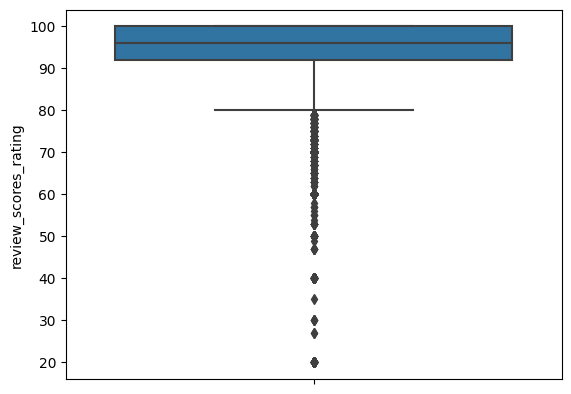

In [16]:
sns.boxplot(data=airbnb, y='review_scores_rating')

In [17]:
airbnb['review_scores_rating'].fillna(airbnb['review_scores_rating'].median(), inplace=True)

### cancellation_policy column

In [18]:
airbnb['cancellation_policy'].describe()

count      74103
unique         3
top       strict
freq       32500
Name: cancellation_policy, dtype: object

In [19]:
airbnb['cancellation_policy'] = airbnb['cancellation_policy'].fillna(airbnb['cancellation_policy'].mode()[0])

### bedrooms Columns

<Axes: >

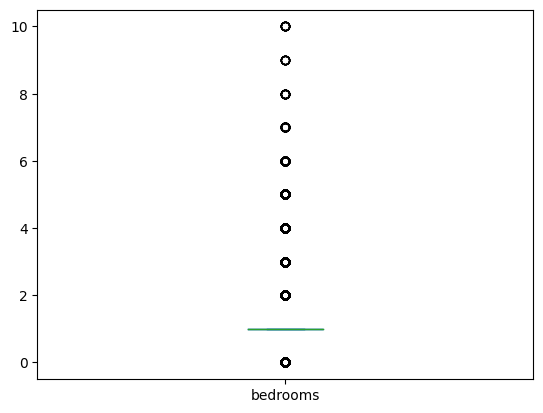

In [20]:
airbnb['bedrooms'].plot(kind='box')

In [21]:
airbnb['bedrooms'].fillna(airbnb['bedrooms'].median(),inplace=True)

### Beds column

<Axes: >

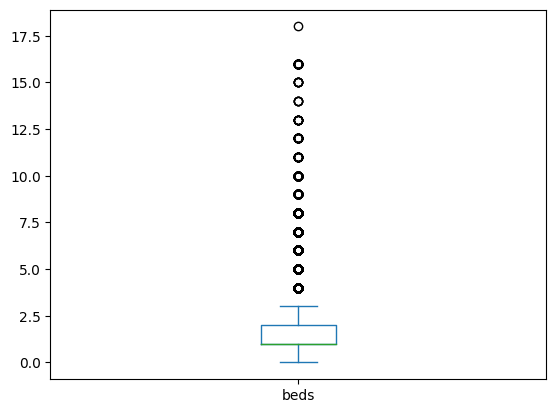

In [22]:
airbnb['beds'].plot(kind='box')

In [23]:
airbnb['beds'].fillna(airbnb['beds'].median(), inplace=True)

### cleaning_fee column

In [24]:
airbnb['cleaning_fee'].fillna(airbnb['cleaning_fee'].median(), inplace=True)

In [25]:
airbnb.isnull().sum()

id                      0
room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

# Part 2: Encoding

In [26]:
airbnb.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,96.0,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [27]:
airbnb.drop(columns='id', inplace=True)

In [28]:
print(airbnb.columns)

Index(['room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')


In [29]:
airbnb['cancellation_policy'].value_counts()

strict      32508
flexible    22543
moderate    19060
Name: cancellation_policy, dtype: int64

In [30]:
airbnb['room_type'].value_counts()

Entire home/apt    41313
Private room       30635
Shared room         2163
Name: room_type, dtype: int64

In [31]:
airbnb['instant_bookable'].value_counts()

f    54660
t    19451
Name: instant_bookable, dtype: int64

In [32]:
airbnb['cancellation_policy'] = airbnb['cancellation_policy'].astype('category').cat.codes

In [33]:

airbnb = pd.get_dummies(columns=['cancellation_policy'], data=airbnb)

In [34]:
airbnb.head()

,room_type,accommodates,bathrooms,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price,cancellation_policy_0,cancellation_policy_1,cancellation_policy_2
0,Entire home/apt,3.0,1.0,True,f,100.0,1.0,1.0,5.010635,0,0,1
1,Entire home/apt,7.0,1.0,True,t,93.0,3.0,3.0,5.129899,0,0,1
2,Entire home/apt,5.0,1.0,True,t,92.0,1.0,3.0,4.976734,0,1,0
3,Entire home/apt,4.0,1.0,True,f,96.0,2.0,2.0,6.620073,1,0,0
4,Entire home/apt,2.0,1.0,True,t,40.0,0.0,1.0,4.744932,0,1,0


In [35]:
#Dropping first dummy variable
airbnb.drop(columns=['cancellation_policy_0'], inplace=True)

In [36]:
airbnb['room_type'] = airbnb['room_type'].astype('category').cat.codes
airbnb = pd.get_dummies(data=airbnb, columns=['room_type'])

In [37]:
airbnb.head(5)

,accommodates,bathrooms,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price,cancellation_policy_1,cancellation_policy_2,room_type_0,room_type_1,room_type_2
0,3.0,1.0,True,f,100.0,1.0,1.0,5.010635,0,1,1,0,0
1,7.0,1.0,True,t,93.0,3.0,3.0,5.129899,0,1,1,0,0
2,5.0,1.0,True,t,92.0,1.0,3.0,4.976734,1,0,1,0,0
3,4.0,1.0,True,f,96.0,2.0,2.0,6.620073,0,0,1,0,0
4,2.0,1.0,True,t,40.0,0.0,1.0,4.744932,1,0,1,0,0


In [38]:
airbnb.drop(columns=['room_type_0'], inplace=True)

In [39]:
airbnb['instant_bookable'] = airbnb['instant_bookable'].astype('category').cat.codes

In [40]:
airbnb.head(5)

,accommodates,bathrooms,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price,cancellation_policy_1,cancellation_policy_2,room_type_1,room_type_2
0,3.0,1.0,True,0,100.0,1.0,1.0,5.010635,0,1,0,0
1,7.0,1.0,True,1,93.0,3.0,3.0,5.129899,0,1,0,0
2,5.0,1.0,True,1,92.0,1.0,3.0,4.976734,1,0,0,0
3,4.0,1.0,True,0,96.0,2.0,2.0,6.620073,0,0,0,0
4,2.0,1.0,True,1,40.0,0.0,1.0,4.744932,1,0,0,0


In [41]:
airbnb['cleaning_fee'] = airbnb['cleaning_fee'].astype('category').cat.codes

In [42]:
airbnb.head(5)

,accommodates,bathrooms,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price,cancellation_policy_1,cancellation_policy_2,room_type_1,room_type_2
0,3.0,1.0,1,0,100.0,1.0,1.0,5.010635,0,1,0,0
1,7.0,1.0,1,1,93.0,3.0,3.0,5.129899,0,1,0,0
2,5.0,1.0,1,1,92.0,1.0,3.0,4.976734,1,0,0,0
3,4.0,1.0,1,0,96.0,2.0,2.0,6.620073,0,0,0,0
4,2.0,1.0,1,1,40.0,0.0,1.0,4.744932,1,0,0,0


# Part 3: Handling outliers

In [43]:
q1 = airbnb.quantile(0.25)
q3 = airbnb.quantile(0.75)
iqr = q3-q1

pos_outlier = q3 + 1.5 * iqr
neg_outlier = q1 - 1.5 * iqr

In [44]:
print(pos_outlier)
print("*************"*5)
print(neg_outlier)
print("*************"*5)

accommodates               7.000000
bathrooms                  1.000000
cleaning_fee               2.500000
instant_bookable           2.500000
review_scores_rating     108.000000
bedrooms                   1.000000
beds                       3.500000
log_price                  6.574657
cancellation_policy_1      2.500000
cancellation_policy_2      2.500000
room_type_1                2.500000
room_type_2                0.000000
dtype: float64
*****************************************************************
accommodates             -1.000000
bathrooms                 1.000000
cleaning_fee             -1.500000
instant_bookable         -1.500000
review_scores_rating     84.000000
bedrooms                  1.000000
beds                     -0.500000
log_price                 2.963187
cancellation_policy_1    -1.500000
cancellation_policy_2    -1.500000
room_type_1              -1.500000
room_type_2               0.000000
dtype: float64
****************************************************

<Axes: >

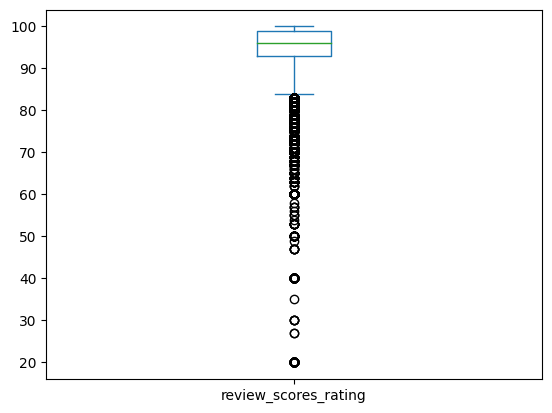

In [45]:
airbnb['review_scores_rating'].plot(kind='box')

In [46]:
new_airbnb = airbnb.copy()

In [47]:
q1_rsr = new_airbnb['review_scores_rating'].quantile(0.25)
q3_rsr = new_airbnb['review_scores_rating'].quantile(0.75)
rsr_iqr = q3_rsr - q1_rsr

rsr_upper = q3_rsr+1.5*rsr_iqr
rsr_lower = q1_rsr-1.5*rsr_iqr

In [48]:
new_airbnb['review_scores_rating'] = np.where(new_airbnb['review_scores_rating']>rsr_upper, rsr_upper, 
                                              np.where(new_airbnb['review_scores_rating']<rsr_lower, rsr_lower,
                                              new_airbnb['review_scores_rating']))

<Axes: >

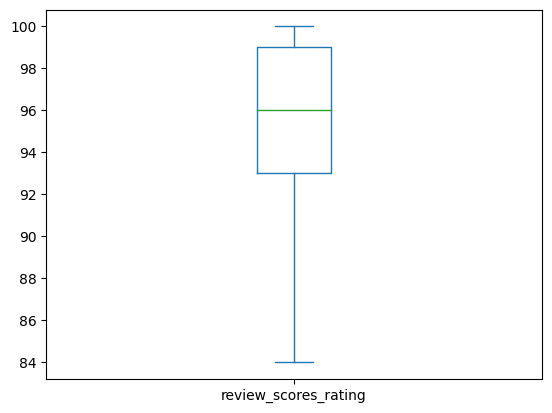

In [49]:
new_airbnb['review_scores_rating'].plot(kind='box')

In [50]:
new_airbnb.columns

Index(['accommodates', 'bathrooms', 'cleaning_fee', 'instant_bookable',
       'review_scores_rating', 'bedrooms', 'beds', 'log_price',
       'cancellation_policy_1', 'cancellation_policy_2', 'room_type_1',
       'room_type_2'],
      dtype='object')

<Axes: >

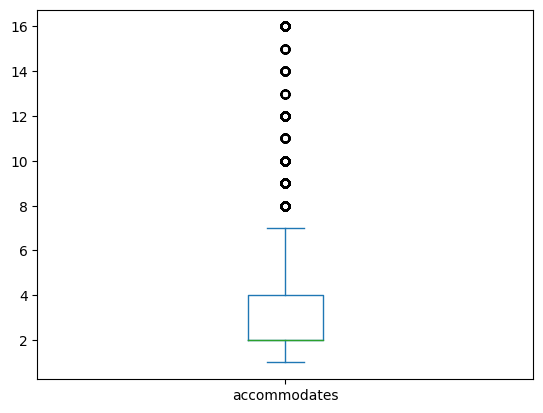

In [51]:
new_airbnb['accommodates'].plot(kind='box')

In [52]:
q1_acco = new_airbnb['accommodates'].quantile(0.25)
q3_acco = new_airbnb['accommodates'].quantile(0.75)
acco_iqr = q3_acco - q1_acco

acco_upper = q3_acco+1.5*acco_iqr
acco_lower = q1_acco-1.5*acco_iqr

new_airbnb['accommodates'] = np.where(new_airbnb['accommodates']>acco_upper, acco_upper,
                                      np.where(new_airbnb['accommodates']<acco_lower, acco_lower, 
                                               new_airbnb['accommodates']))

<Axes: >

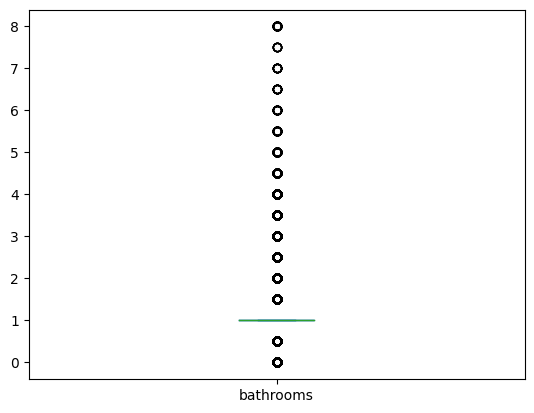

In [53]:
new_airbnb['bathrooms'].plot(kind='box')

In [54]:
q1_bath = new_airbnb['bathrooms'].quantile(0.25)
q3_bath = new_airbnb['bathrooms'].quantile(0.75)
bath_iqr = q3_bath - q1_bath

bath_upper = q3_bath+1.5*bath_iqr
bath_lower = q1_bath-1.5*bath_iqr

new_airbnb['bathrooms'] = np.where(new_airbnb['bathrooms']>bath_upper, bath_upper,
                                      np.where(new_airbnb['bathrooms']<bath_lower, bath_lower, 
                                               new_airbnb['bathrooms']))

<Axes: >

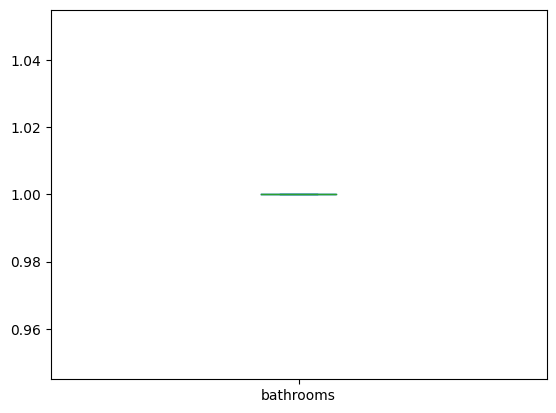

In [55]:
new_airbnb['bathrooms'].plot(kind='box')

<Axes: >

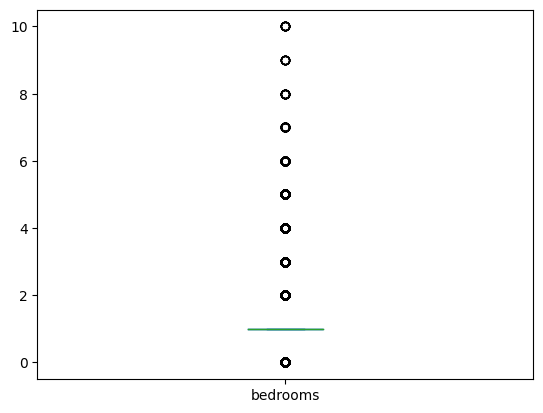

In [58]:
new_airbnb['bedrooms'].plot(kind='box')

<Axes: >

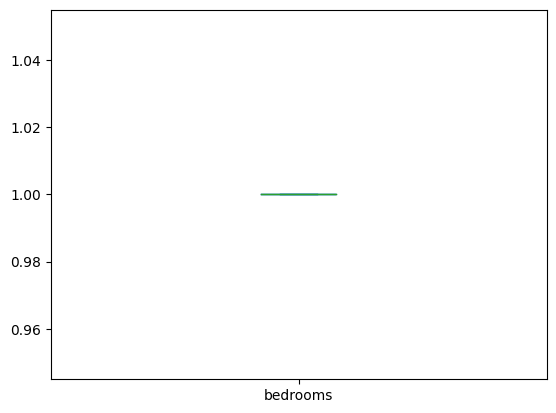

In [59]:
q1_bedr = new_airbnb['bedrooms'].quantile(0.25)
q3_bedr = new_airbnb['bedrooms'].quantile(0.75)
bedr_iqr = q3_bedr - q1_bedr

bedr_upper = q3_bedr+1.5*bedr_iqr
bedr_lower = q1_bedr-1.5*bedr_iqr

new_airbnb['bedrooms'] = np.where(new_airbnb['bedrooms']>bedr_upper, bedr_upper,
                                      np.where(new_airbnb['bedrooms']<bedr_lower, bedr_lower, 
                                               new_airbnb['bedrooms']))

new_airbnb['bedrooms'].plot(kind='box')

<Axes: >

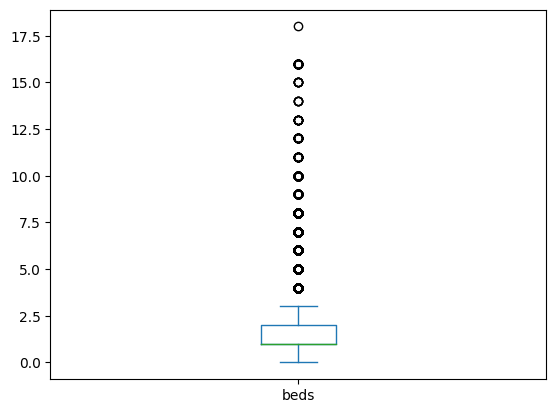

In [60]:
new_airbnb['beds'].plot(kind='box')

<Axes: >

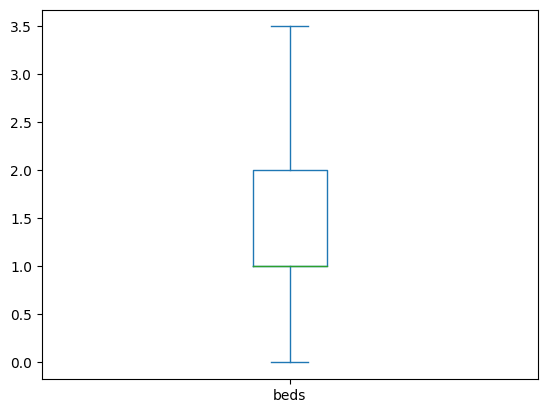

In [61]:
q1_beds = new_airbnb['beds'].quantile(0.25)
q3_beds = new_airbnb['beds'].quantile(0.75)
beds_iqr = q3_beds - q1_beds

beds_upper = q3_beds+1.5*beds_iqr
beds_lower = q1_beds-1.5*beds_iqr

new_airbnb['beds'] = np.where(new_airbnb['beds']>beds_upper, beds_upper,
                                      np.where(new_airbnb['beds']<beds_lower, beds_lower, 
                                               new_airbnb['beds']))

new_airbnb['beds'].plot(kind='box')

# Part 4: Feature Scaling
Feature scaling is only for dependent variables

In [64]:
# Splitting the dataset into dependent and independent 

x = new_airbnb.loc[:, new_airbnb.columns!='log_price']
y = new_airbnb['log_price']

In [65]:
x.columns

Index(['accommodates', 'bathrooms', 'cleaning_fee', 'instant_bookable',
       'review_scores_rating', 'bedrooms', 'beds', 'cancellation_policy_1',
       'cancellation_policy_2', 'room_type_1', 'room_type_2'],
      dtype='object')

In [66]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_x = sc.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.010620,0.0,0.601880,-0.596535,1.076637,0.0,-0.704668,-0.588408,1.131272,-0.839429,-0.173388
1,2.349267,0.0,0.601880,1.676347,-0.460912,0.0,1.680028,-0.588408,1.131272,-0.839429,-0.173388
2,1.169324,0.0,0.601880,1.676347,-0.680562,0.0,1.680028,1.699500,-0.883960,-0.839429,-0.173388
3,0.579352,0.0,0.601880,-0.596535,0.198038,0.0,0.487680,-0.588408,-0.883960,-0.839429,-0.173388
4,-0.600591,0.0,0.601880,1.676347,-2.437761,0.0,-0.704668,1.699500,-0.883960,-0.839429,-0.173388
...,...,...,...,...,...,...,...,...,...,...,...
74106,-1.190563,0.0,-1.661461,-0.596535,0.198038,0.0,-0.704668,-0.588408,-0.883960,1.191285,-0.173388
74107,0.579352,0.0,0.601880,-0.596535,-0.460912,0.0,2.276202,1.699500,-0.883960,-0.839429,-0.173388
74108,1.169324,0.0,0.601880,1.676347,-0.241262,0.0,0.487680,1.699500,-0.883960,-0.839429,-0.173388
74109,-0.600591,0.0,0.601880,1.676347,0.198038,0.0,0.487680,-0.588408,1.131272,-0.839429,-0.173388


# Checking correlation

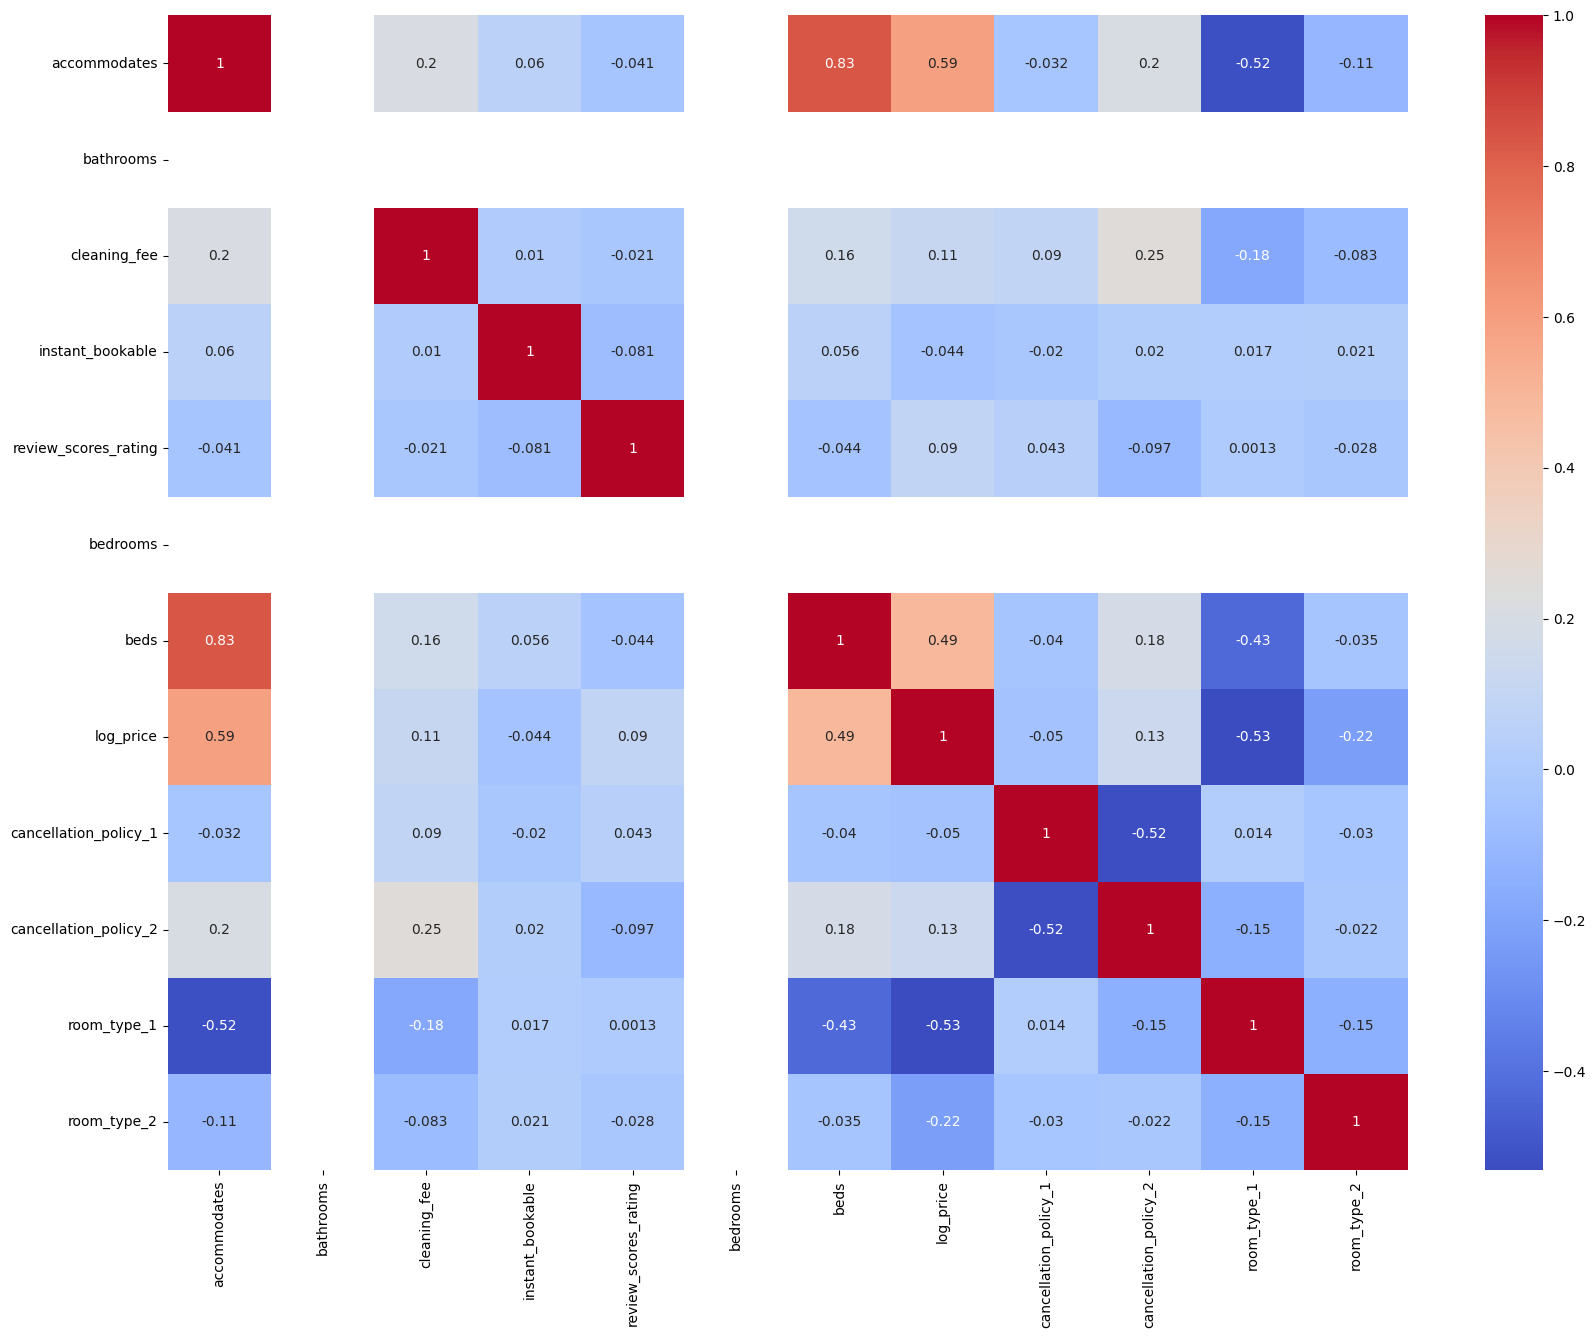

In [69]:
plt.figure(figsize=(20,15))
corr = new_airbnb.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### # Checking Variance Inflation factor

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = sc_x
vif = pd.DataFrame()
vif['variance inflation factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Features'] = x.columns

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [71]:
vif

,variance inflation factor,Features
0,3.866137,accommodates
1,NaN,bathrooms
2,1.186267,cleaning_fee
3,1.014748,instant_bookable
4,1.018556,review_scores_rating
5,NaN,bedrooms
6,3.320936,beds
7,1.480323,cancellation_policy_1
8,1.612832,cancellation_policy_2
9,1.472626,room_type_1


# Building Linear regression model

In [81]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [82]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [83]:
print(lm.intercept_)
print(lm.coef_)

3.192496020576039
[ 1.51633165e-01 -2.77555756e-17 -8.06492027e-02 -8.13231607e-02
  1.51573992e-02 -5.55111512e-17  2.94493009e-02 -7.08330145e-02
 -6.60814667e-03 -5.46307752e-01 -1.00330153e+00]


In [85]:
y_pred_price = lm.predict(x_test)
print(y_pred_price)

[4.28253201 4.89967277 4.89967277 ... 4.33640251 5.63385013 5.41279691]


### Validation and metrics

In [86]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_price)

0.4938727617268259

In [87]:
y_pred_price_train = lm.predict(x_train)
r2_score(y_train, y_pred_price_train)

0.48572782944350146

# OLS Method

In [88]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [89]:
reg_model = smf.OLS(endog= y_train, exog=x_train).fit()

In [90]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     5832.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:12:54   Log-Likelihood:                -41905.
No. Observations:               55583   AIC:                         8.383e+04
Df Residuals:                   55573   BIC:                         8.392e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
accommodates              0.1519      0.003     54.052      0.000       0.146       0.157
bathrooms             -1.917e+09   7.97e+09     -0.241      0.810   -1.75e+10    1.37e+10
cleaning_fee             -0.0806      0.005    -15.011      0.000      -0.091      -0.070
instant_bookable         -0.0813      0.005    -16.268      0.000      -0.091      -0.072
review_scores_rating      0.0152      0.000     31.261      0.000       0.014       0.016
bedrooms               1.917e+09   7.97e+09      0.241      0.810   -1.37e+10    1.75e+10
beds                      0.0294      0.005      6.240      0.000       0.020       0.039
cancellation_policy_1    -0.0708      0.006    -11.647      0.000      -0.083      -0.059
cancellation_policy_2    -0.0066      0.006     -1.186      0.236      -0.018       0.004
room_type_1              -0.5463      0.005   -101.622      0.000      -0.557      -0.536
room_type_2              -1.0033      0.014    -73.849      0.000      -1.030      -0.977
==============================================================================
Omnibus:                     6114.784   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14861.052
Skew:                           0.651   Prob(JB):                         0.00
Kurtosis:                       5.173   Cond. No.                     4.92e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.08e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""